In [1]:
# !pip3 install -U pip wheel setuptools
# !pip3 install -U numpy pandas scikit-learn matplotlib seaborn


In [2]:
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
def sinplot(n=10, flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, n + 1):
        plt.plot(x, np.sin(x + i * .5) * (n + 2 - i) * flip)


In [30]:
DATASET_DIR = Path('/data/datasets')
CS_CAMPUS_DIR = DATASET_DIR / 'dataset_cs_campus'

def readCatalog(mode: str, num: int):
    assert(0 <= num and num < 14)
    if mode == 'db':
        fn = CS_CAMPUS_DIR / 'catalog' / f"db_catalog_{num}.txt"
    elif mode == 'qr':
        fn = CS_CAMPUS_DIR / 'catalog' / 'qr_catalog.txt'
    with open(fn, 'r') as f:
        lines = f.readlines()
        paths = []
        xs = []
        ys = []
        for line in lines:
            words = line.strip().split(' ')
            paths.append(words[1])
            xs.append(float(words[2]))
            ys.append(float(words[3]))
    return paths, xs, ys

def readGPS(num: int):
    assert(13 <= num and num < 20)
    fn = CS_CAMPUS_DIR / f"benchmark_datasets/umd/umcp_lidar5_ground_umd_gps_{num}" / 'umd_aerial_cloud_20m_100coverage_4096.csv'
    with open(fn, 'r') as f:
        lines = f.readlines()
        paths = []
        xs = []
        ys = []
        for line in lines[1:]:
            words = line.strip().split(',')
            paths.append(words[0])
            xs.append(float(words[1]))
            ys.append(float(words[2]))
    return paths, xs, ys


3263.0437510004267
1515.6045399999712


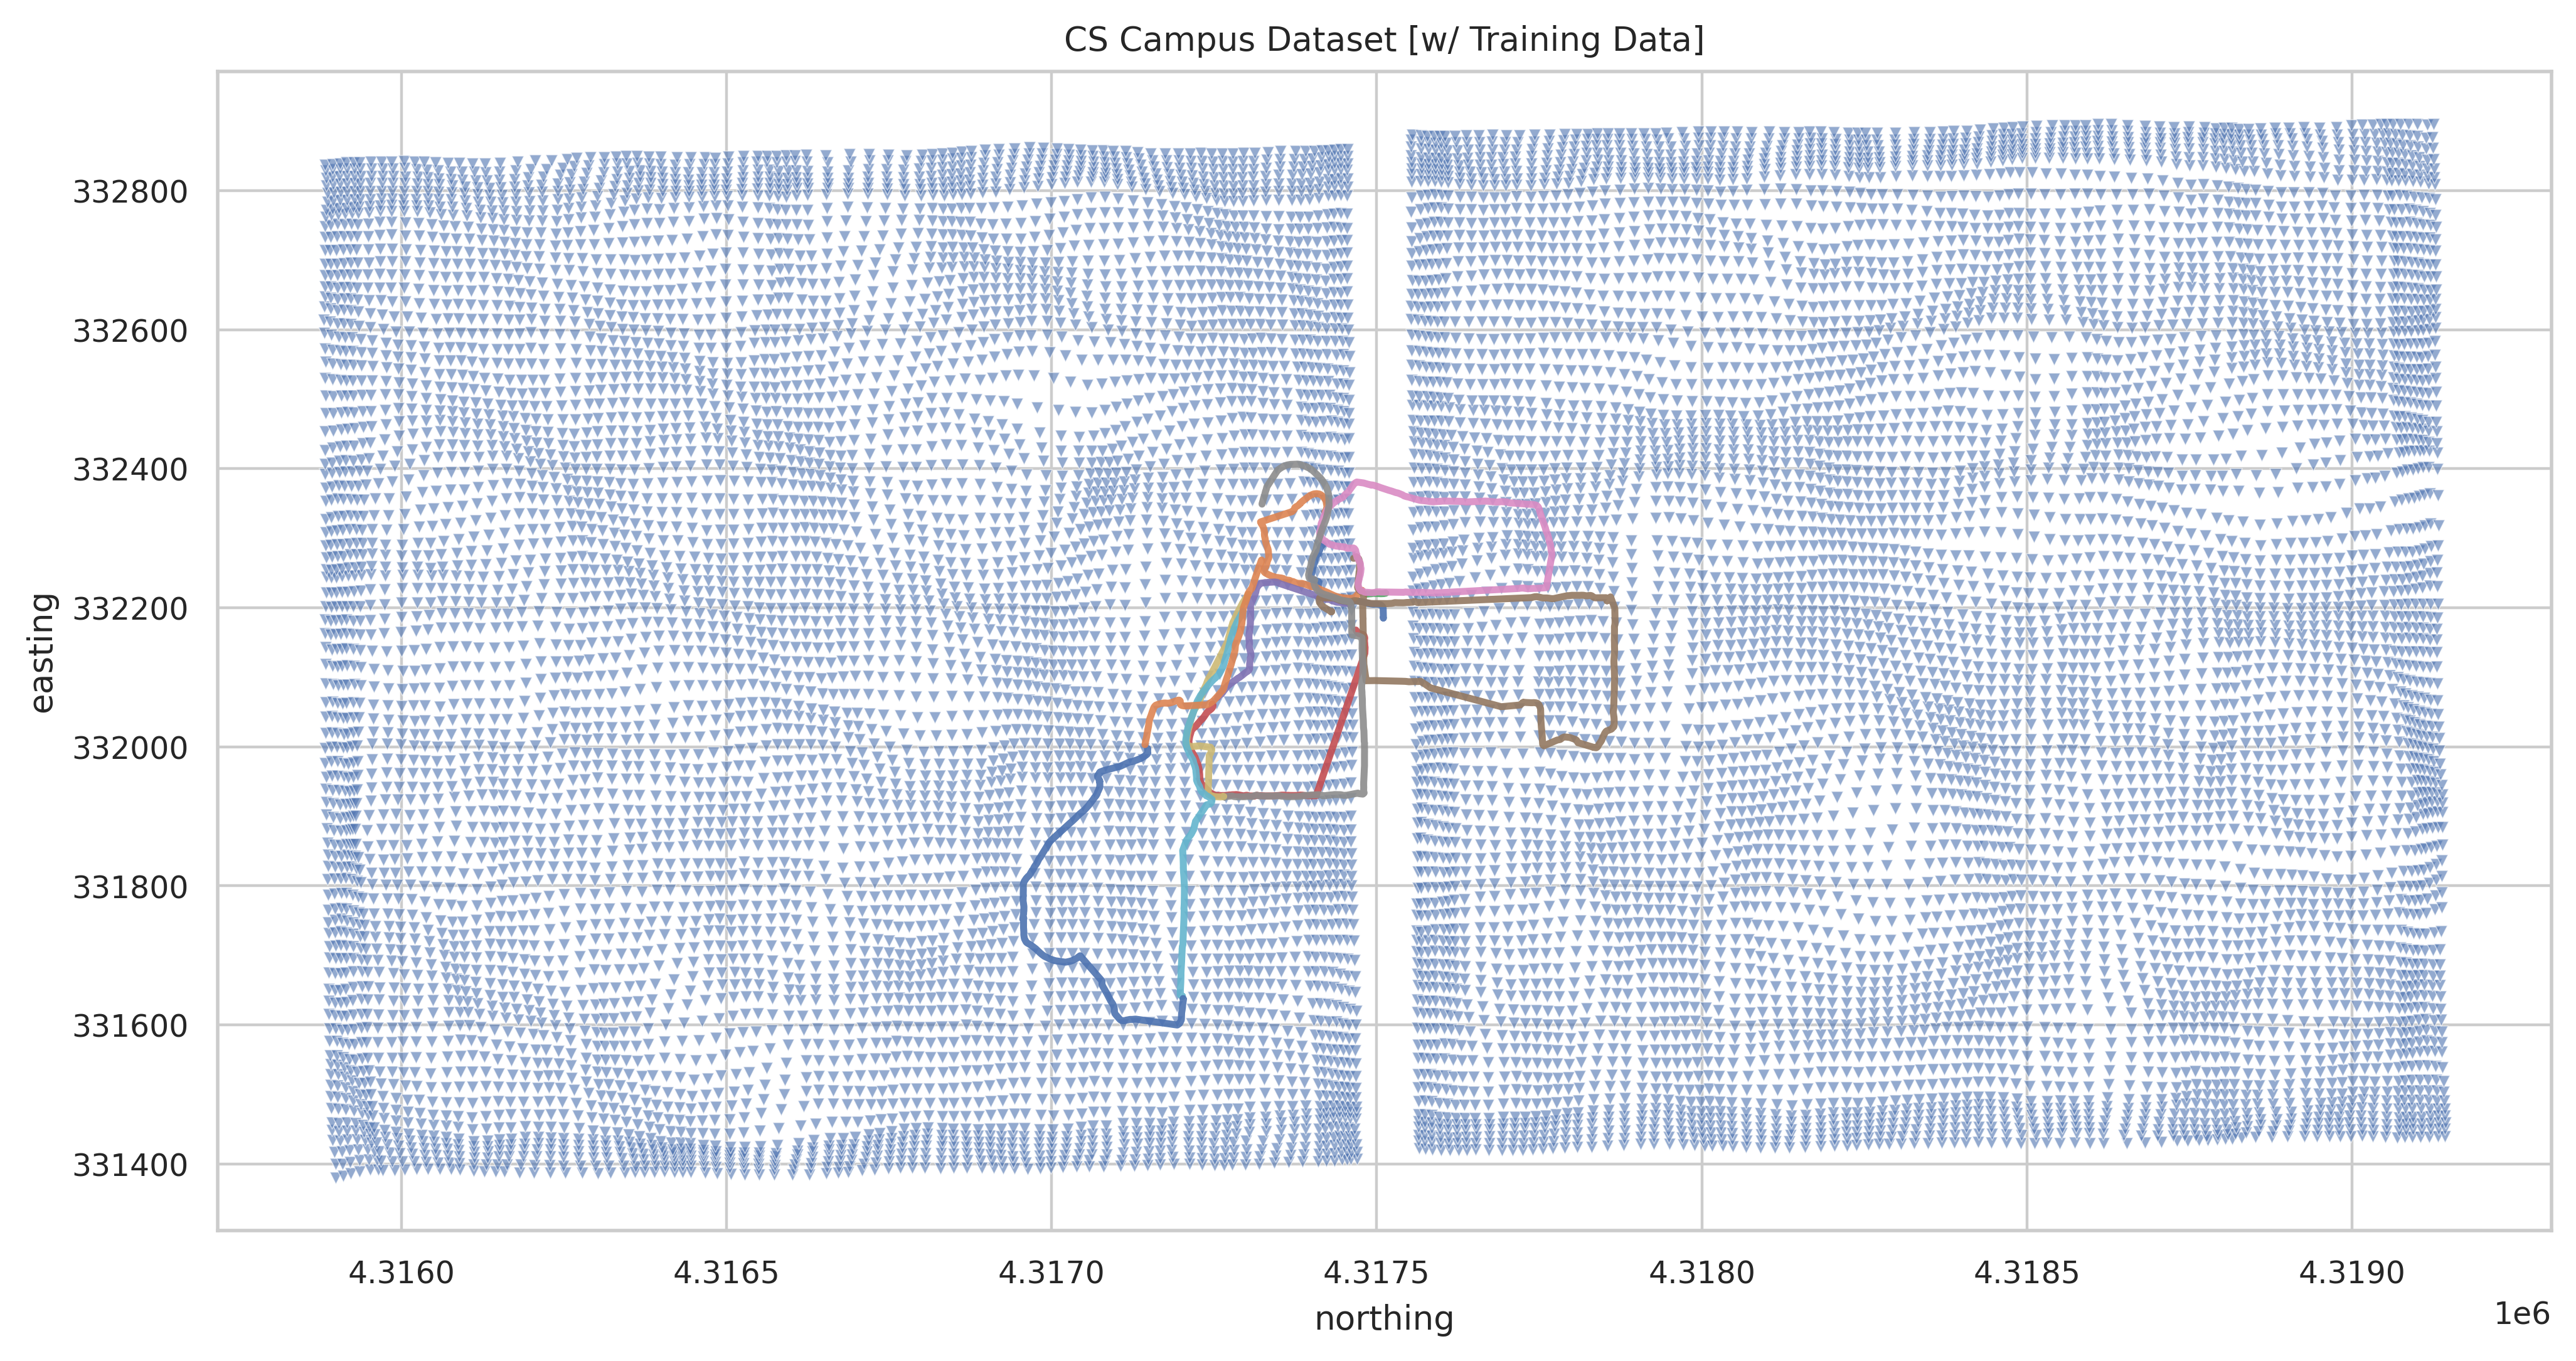

In [34]:
paths, xs, ys = readCatalog('db', 1)
xs = np.array(xs, dtype=float)
ys = np.array(ys, dtype=float)

print(xs.max() - xs.min())
print(ys.max() - ys.min())
plt.figure(figsize=(12, 6), dpi=400)

sns.set_theme(context='paper', style='whitegrid')
sns.scatterplot(x=xs, y=ys, marker='v', s=12, alpha=0.6)

for idx in range(2, 14):
    paths, xs, ys = readCatalog('db', idx)
    xs = np.array(xs, dtype=float)
    ys = np.array(ys, dtype=float)
    # sns.lineplot(x=xs, y=ys, alpha=0.6, linewidth=1)
    plt.plot(xs, ys, alpha=0.9, linewidth=2)


# Customize the plot
plt.title('CS Campus Dataset [w/ Training Data]')
plt.xlabel('northing')
plt.ylabel('easting')

# Display the plot
plt.show()


[0] x_len: 3263.04, y_len: 1515.60
[1] x_len: 3263.04, y_len: 1515.60


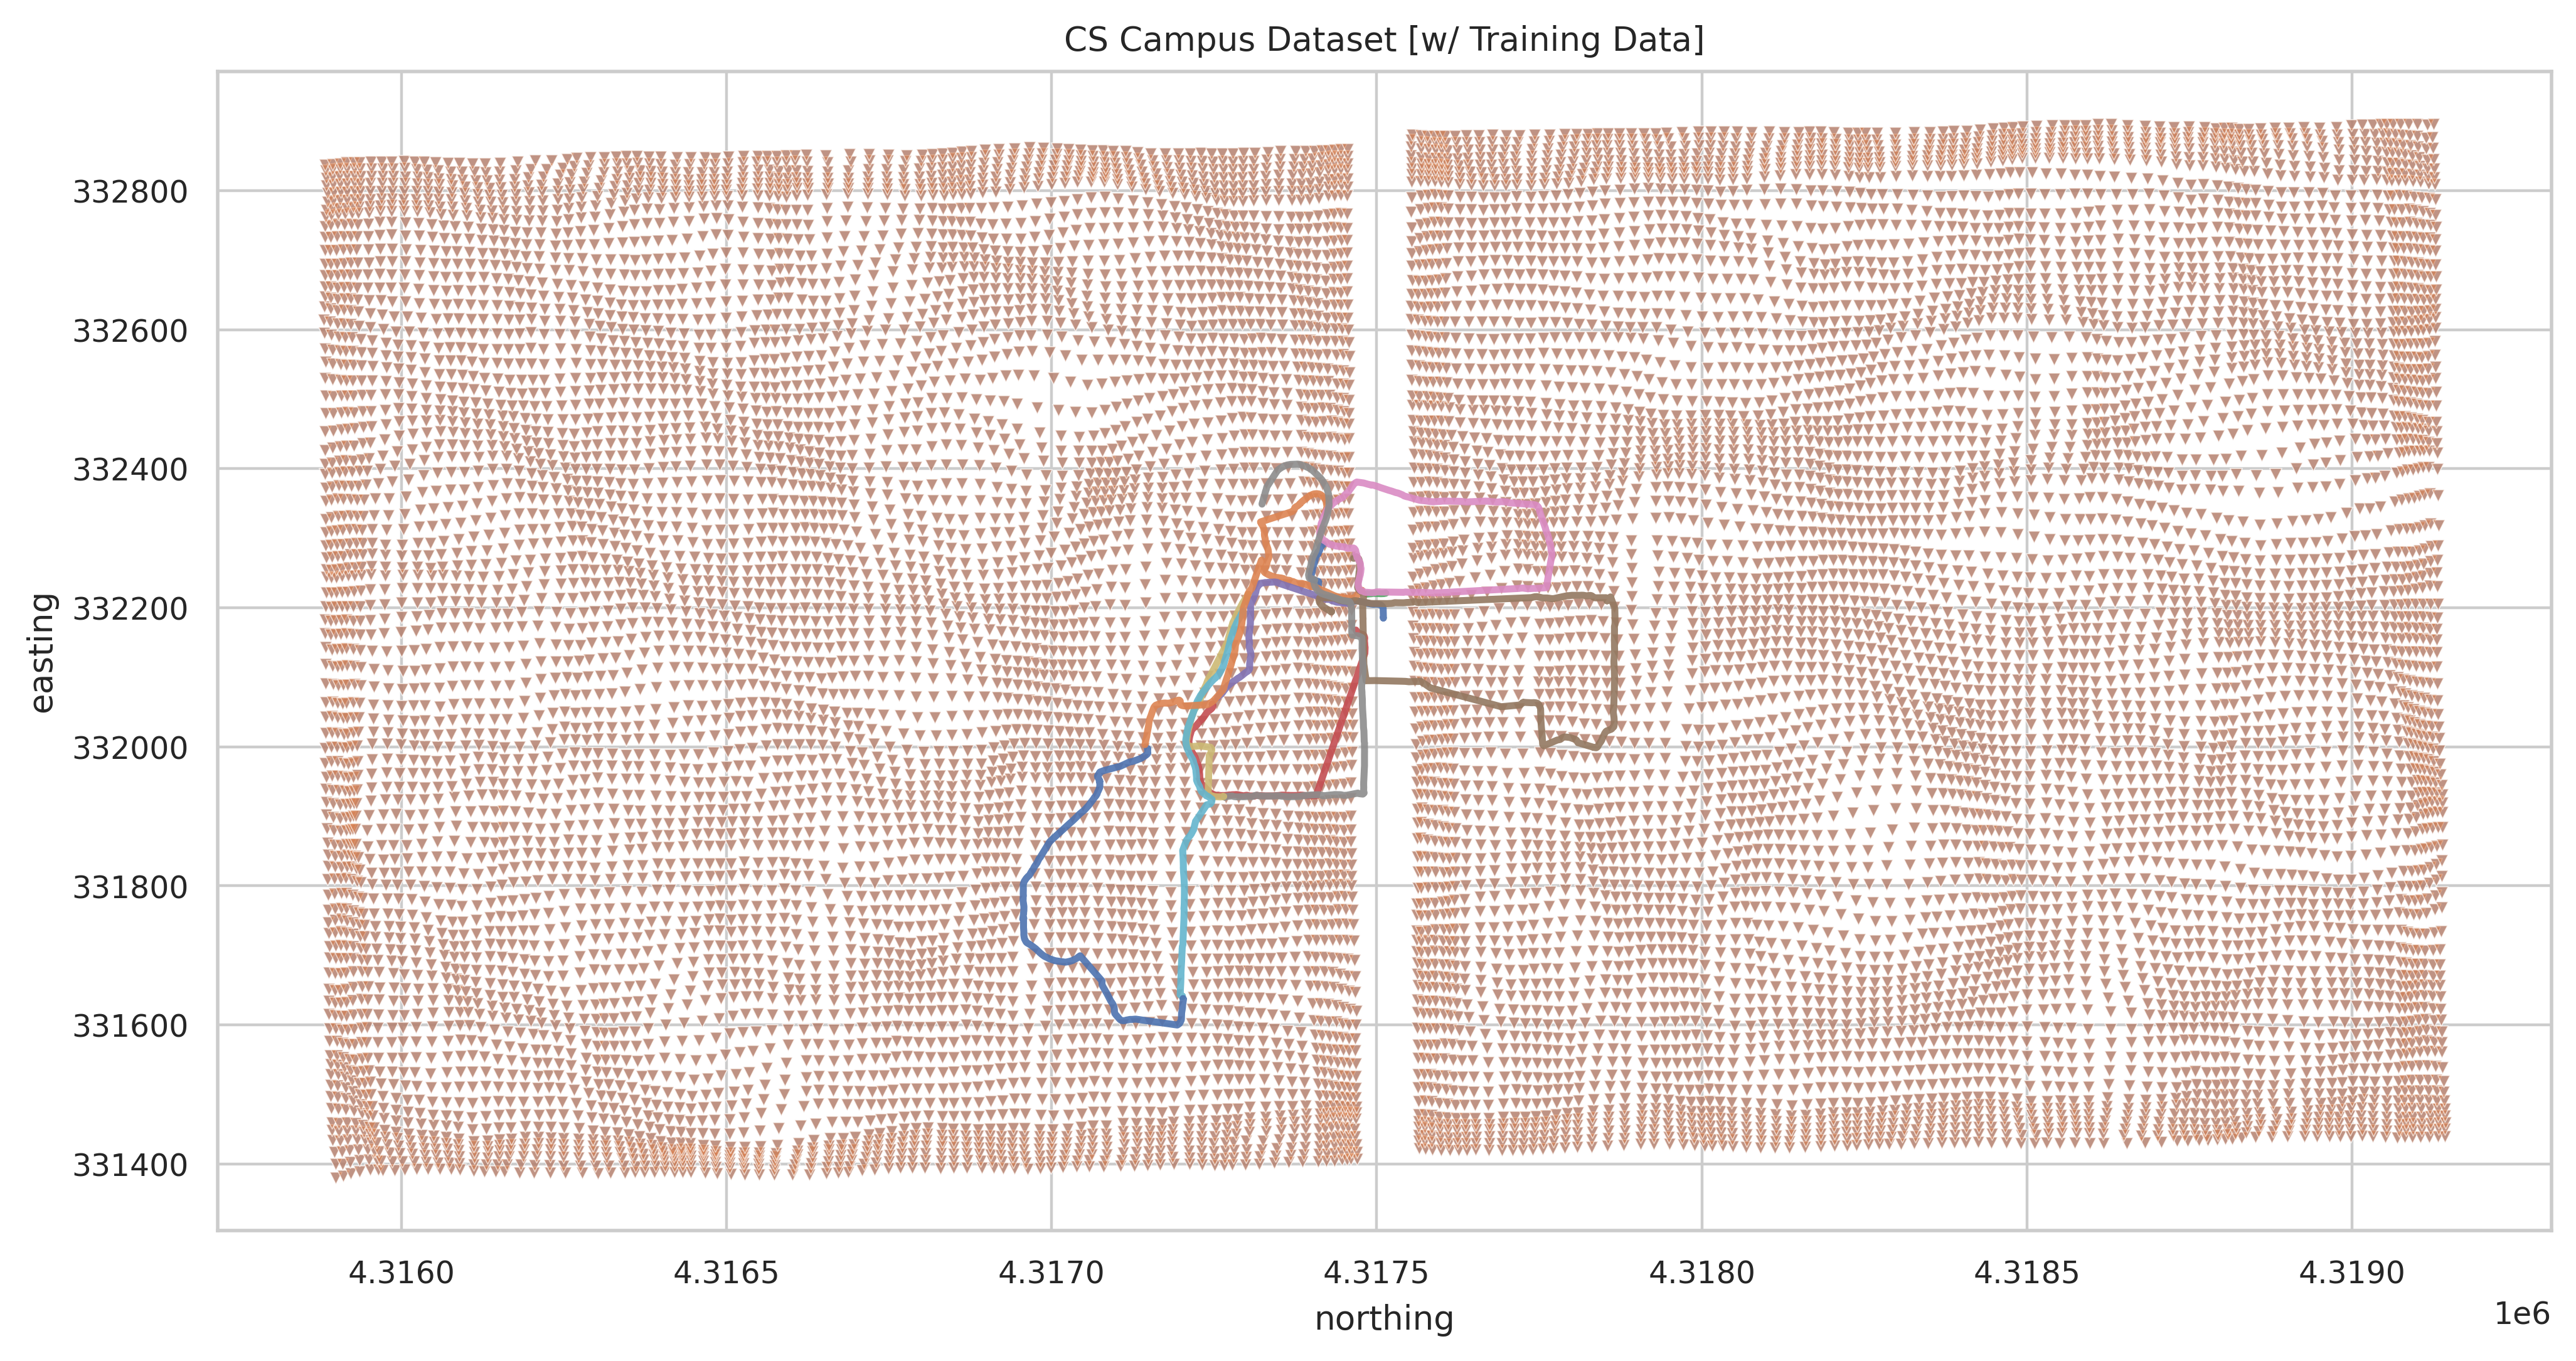

In [35]:
plt.figure(figsize=(12, 6), dpi=400)
sns.set_theme(context='paper', style='whitegrid')

for ae_idx in range(2):
    paths, xs, ys = readCatalog('db', ae_idx)
    xs = np.array(xs, dtype=float)
    ys = np.array(ys, dtype=float)
    x_len = xs.max() - xs.min()
    y_len = ys.max() - ys.min()
    print(f"[{ae_idx}] x_len: {x_len:.2f}, y_len: {y_len:.2f}")
    sns.scatterplot(x=xs, y=ys, marker='v', s=12, alpha=0.6)

for idx in range(2, 14):
    paths, xs, ys = readCatalog('db', idx)
    xs = np.array(xs, dtype=float)
    ys = np.array(ys, dtype=float)
    # sns.lineplot(x=xs, y=ys, alpha=0.6, linewidth=1)
    plt.plot(xs, ys, alpha=0.9, linewidth=2)


# Customize the plot
plt.title('CS Campus Dataset [w/ Training Data]')
plt.xlabel('northing')
plt.ylabel('easting')

# Display the plot
plt.show()


3263.0437510004267
1515.6045399999712


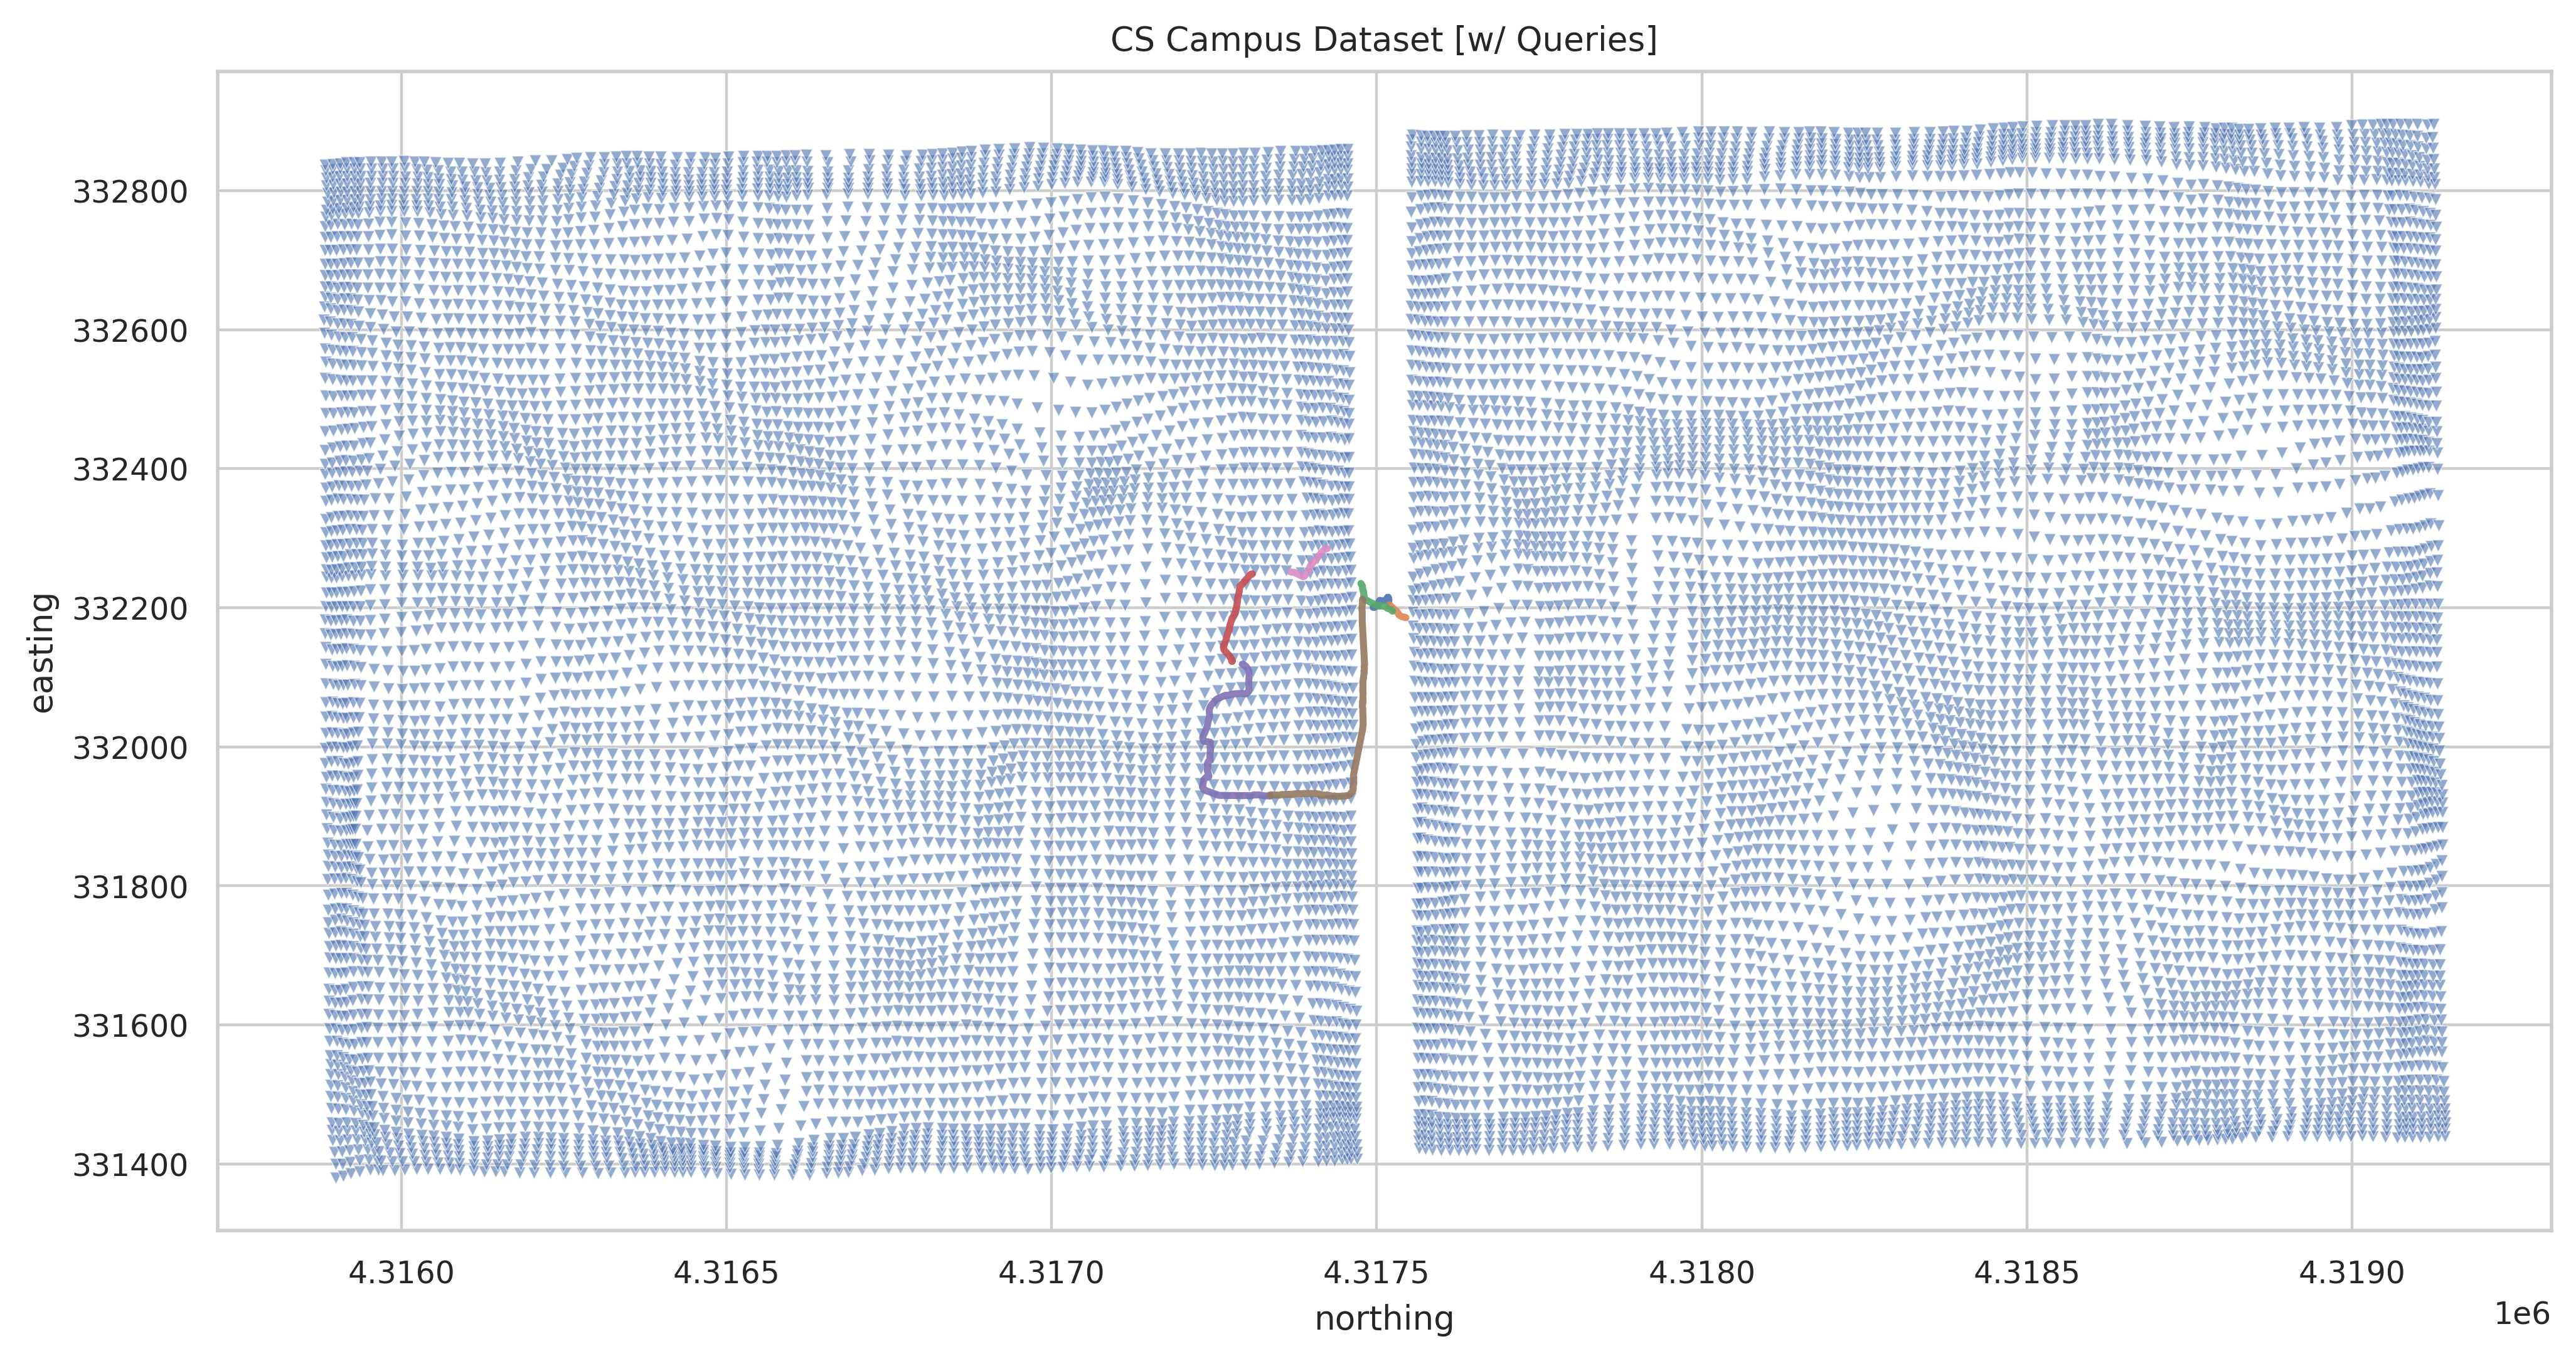

In [33]:
paths, xs, ys = readCatalog('db', 1)
xs = np.array(xs, dtype=float)
ys = np.array(ys, dtype=float)

print(xs.max() - xs.min())
print(ys.max() - ys.min())
plt.figure(figsize=(12, 6), dpi=400)

sns.set_theme(context='paper', style='whitegrid')
sns.scatterplot(x=xs, y=ys, marker='v', s=12, alpha=0.6)

for idx in range(13, 20):
    paths, xs, ys = readGPS(idx)
    xs = np.array(xs, dtype=float)
    ys = np.array(ys, dtype=float)
    # sns.lineplot(x=xs, y=ys, alpha=0.6, linewidth=1)
    plt.plot(xs, ys, alpha=0.9, linewidth=2)

# Customize the plot
plt.title('CS Campus Dataset [w/ Queries]')
plt.xlabel('northing')
plt.ylabel('easting')

# Display the plot
plt.show()




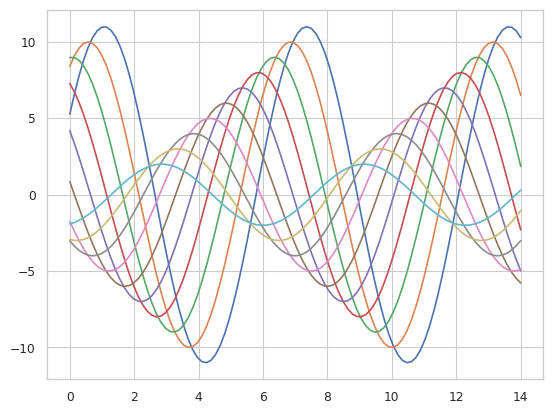

In [12]:
sns.set_theme(context='paper', style='whitegrid')
sinplot()


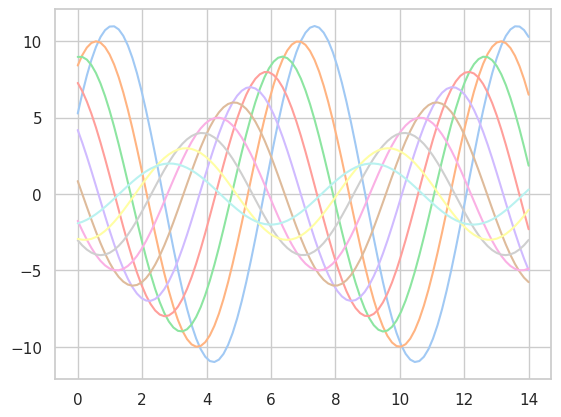

In [18]:
sns.set_theme(context='notebook', style='whitegrid', palette='pastel')
sinplot()


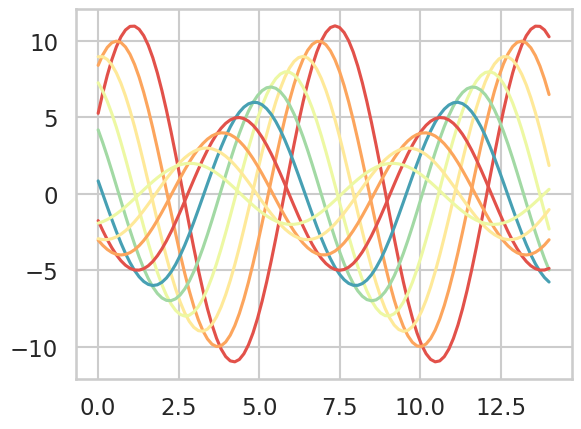

In [19]:
sns.set_theme(context='talk', style='whitegrid', palette='Spectral')
sinplot()


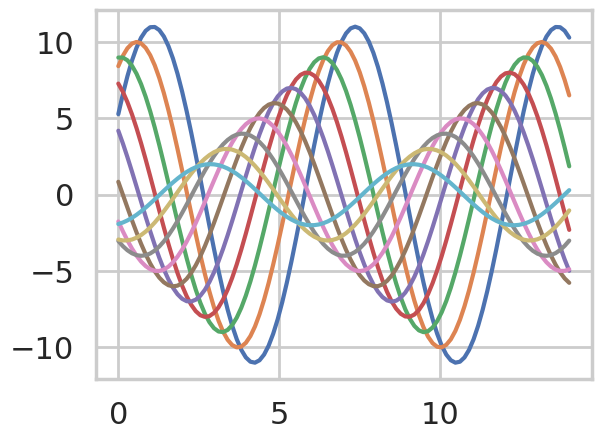

In [16]:
sns.set_theme(context='poster', style='whitegrid')
sinplot()


In [12]:
import torch
from torch.nn.utils.rnn import pad_sequence
a = torch.ones(5, 16)
b = torch.ones(4, 16)
c = torch.ones(2, 16)
D = pad_sequence([a, b, c], batch_first=True)
print(D.shape)
print(D[0][-1].tolist())
print(D[1][-1].tolist())
print(D[2][-1].tolist())


print()
print(D[0][-2].tolist())
print(D[1][-2].tolist())
print(D[2][-2].tolist())


torch.Size([3, 5, 16])
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
